In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

if not os.path.exists('details.png') :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/13_CCL/details.png --no-check-certificate

details = cv2.imread('details.png', cv2.IMREAD_GRAYSCALE)

In [2]:
def img_show(image):
    plt.figure(figsize=(7, 7))
    plt.imshow(image, cmap="gray")
    plt.xticks([]), plt.yticks([])
    plt.show()

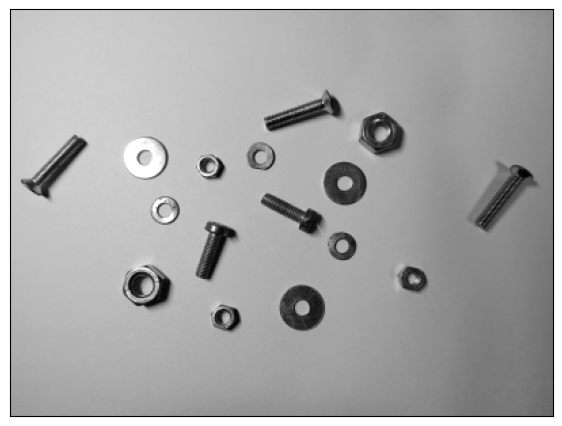

In [3]:
img_show(details)

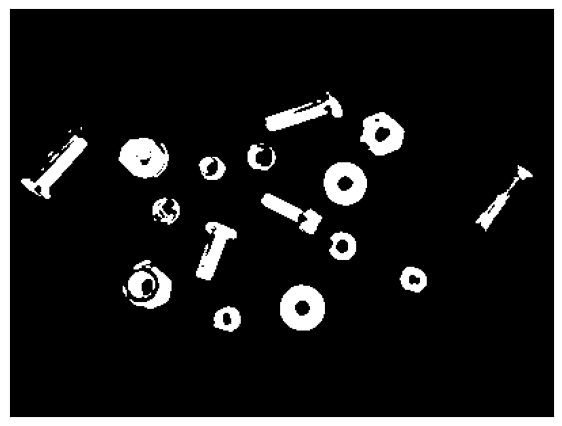

In [4]:
details_bin = cv2.medianBlur(details, 3)
s = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
top = cv2.morphologyEx(details_bin, cv2.MORPH_TOPHAT, s)
bla = cv2.morphologyEx(details_bin, cv2.MORPH_BLACKHAT, s)

temp = np.where(details_bin < 210, 0, 1)
temp = temp.astype('uint8')

temp2 = np.where(bla < 50, 0, 1)
temp2 = temp2.astype('uint8')

binary = temp + temp2
img_show(binary)

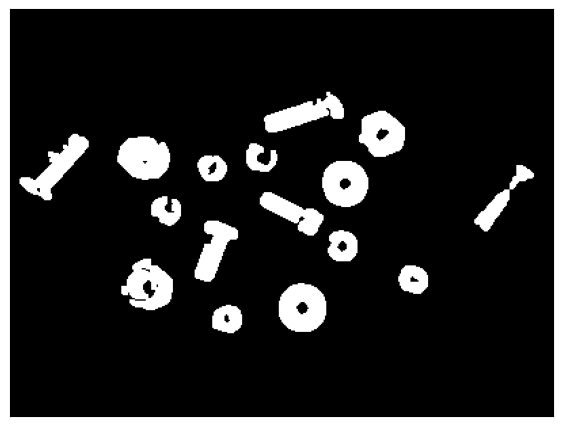

In [5]:
binary = cv2.medianBlur(binary, 3)
binary = cv2.dilate(binary, np.ones((3, 3)))
img_show(binary)

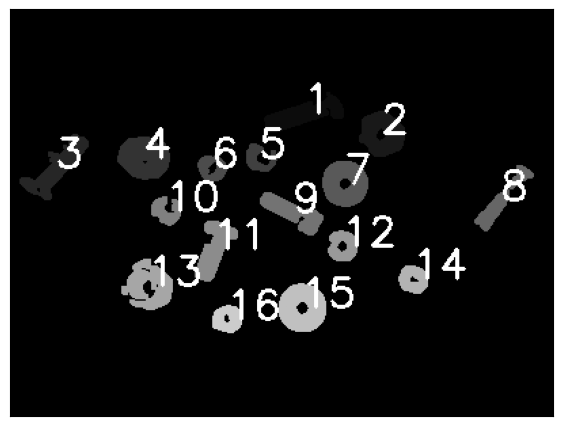

In [6]:
lb, details_ident, stats, centr = cv2.connectedComponentsWithStats(binary)
ccl_vis = details_ident.copy()
for i in range(1, lb):
    cv2.putText(ccl_vis, str(i), (int(centr[i, 0]), int(
        centr[i, 1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (20, 0, 0), 2)
img_show(ccl_vis)

Obiekt numer 1
Moments: 823.0
HuMoments 1: 0.375114
HuMoments 2: 0.108379
HuMoments 3: 0.000414
Obiekt numer 2
Moments: 820.0
HuMoments 1: 0.180298
HuMoments 2: 0.000264
HuMoments 3: 0.000026
Obiekt numer 3
Moments: 857.0
HuMoments 1: 0.357874
HuMoments 2: 0.087804
HuMoments 3: 0.001549
Obiekt numer 4
Moments: 962.0
HuMoments 1: 0.165167
HuMoments 2: 0.001294
HuMoments 3: 0.000013
Obiekt numer 5
Moments: 283.0
HuMoments 1: 0.257797
HuMoments 2: 0.004114
HuMoments 3: 0.001454
Obiekt numer 6
Moments: 303.0
HuMoments 1: 0.195612
HuMoments 2: 0.000740
HuMoments 3: 0.000052
Obiekt numer 7
Moments: 887.0
HuMoments 1: 0.176528
HuMoments 2: 0.000023
HuMoments 3: 0.000004
Obiekt numer 8
Moments: 513.0
HuMoments 1: 0.609881
HuMoments 2: 0.326193
HuMoments 3: 0.022668
Obiekt numer 9
Moments: 658.0
HuMoments 1: 0.327546
HuMoments 2: 0.073582
HuMoments 3: 0.001996
Obiekt numer 10
Moments: 320.0
HuMoments 1: 0.199063
HuMoments 2: 0.001496
HuMoments 3: 0.000196
Obiekt numer 11
Moments: 736.0
HuMoment

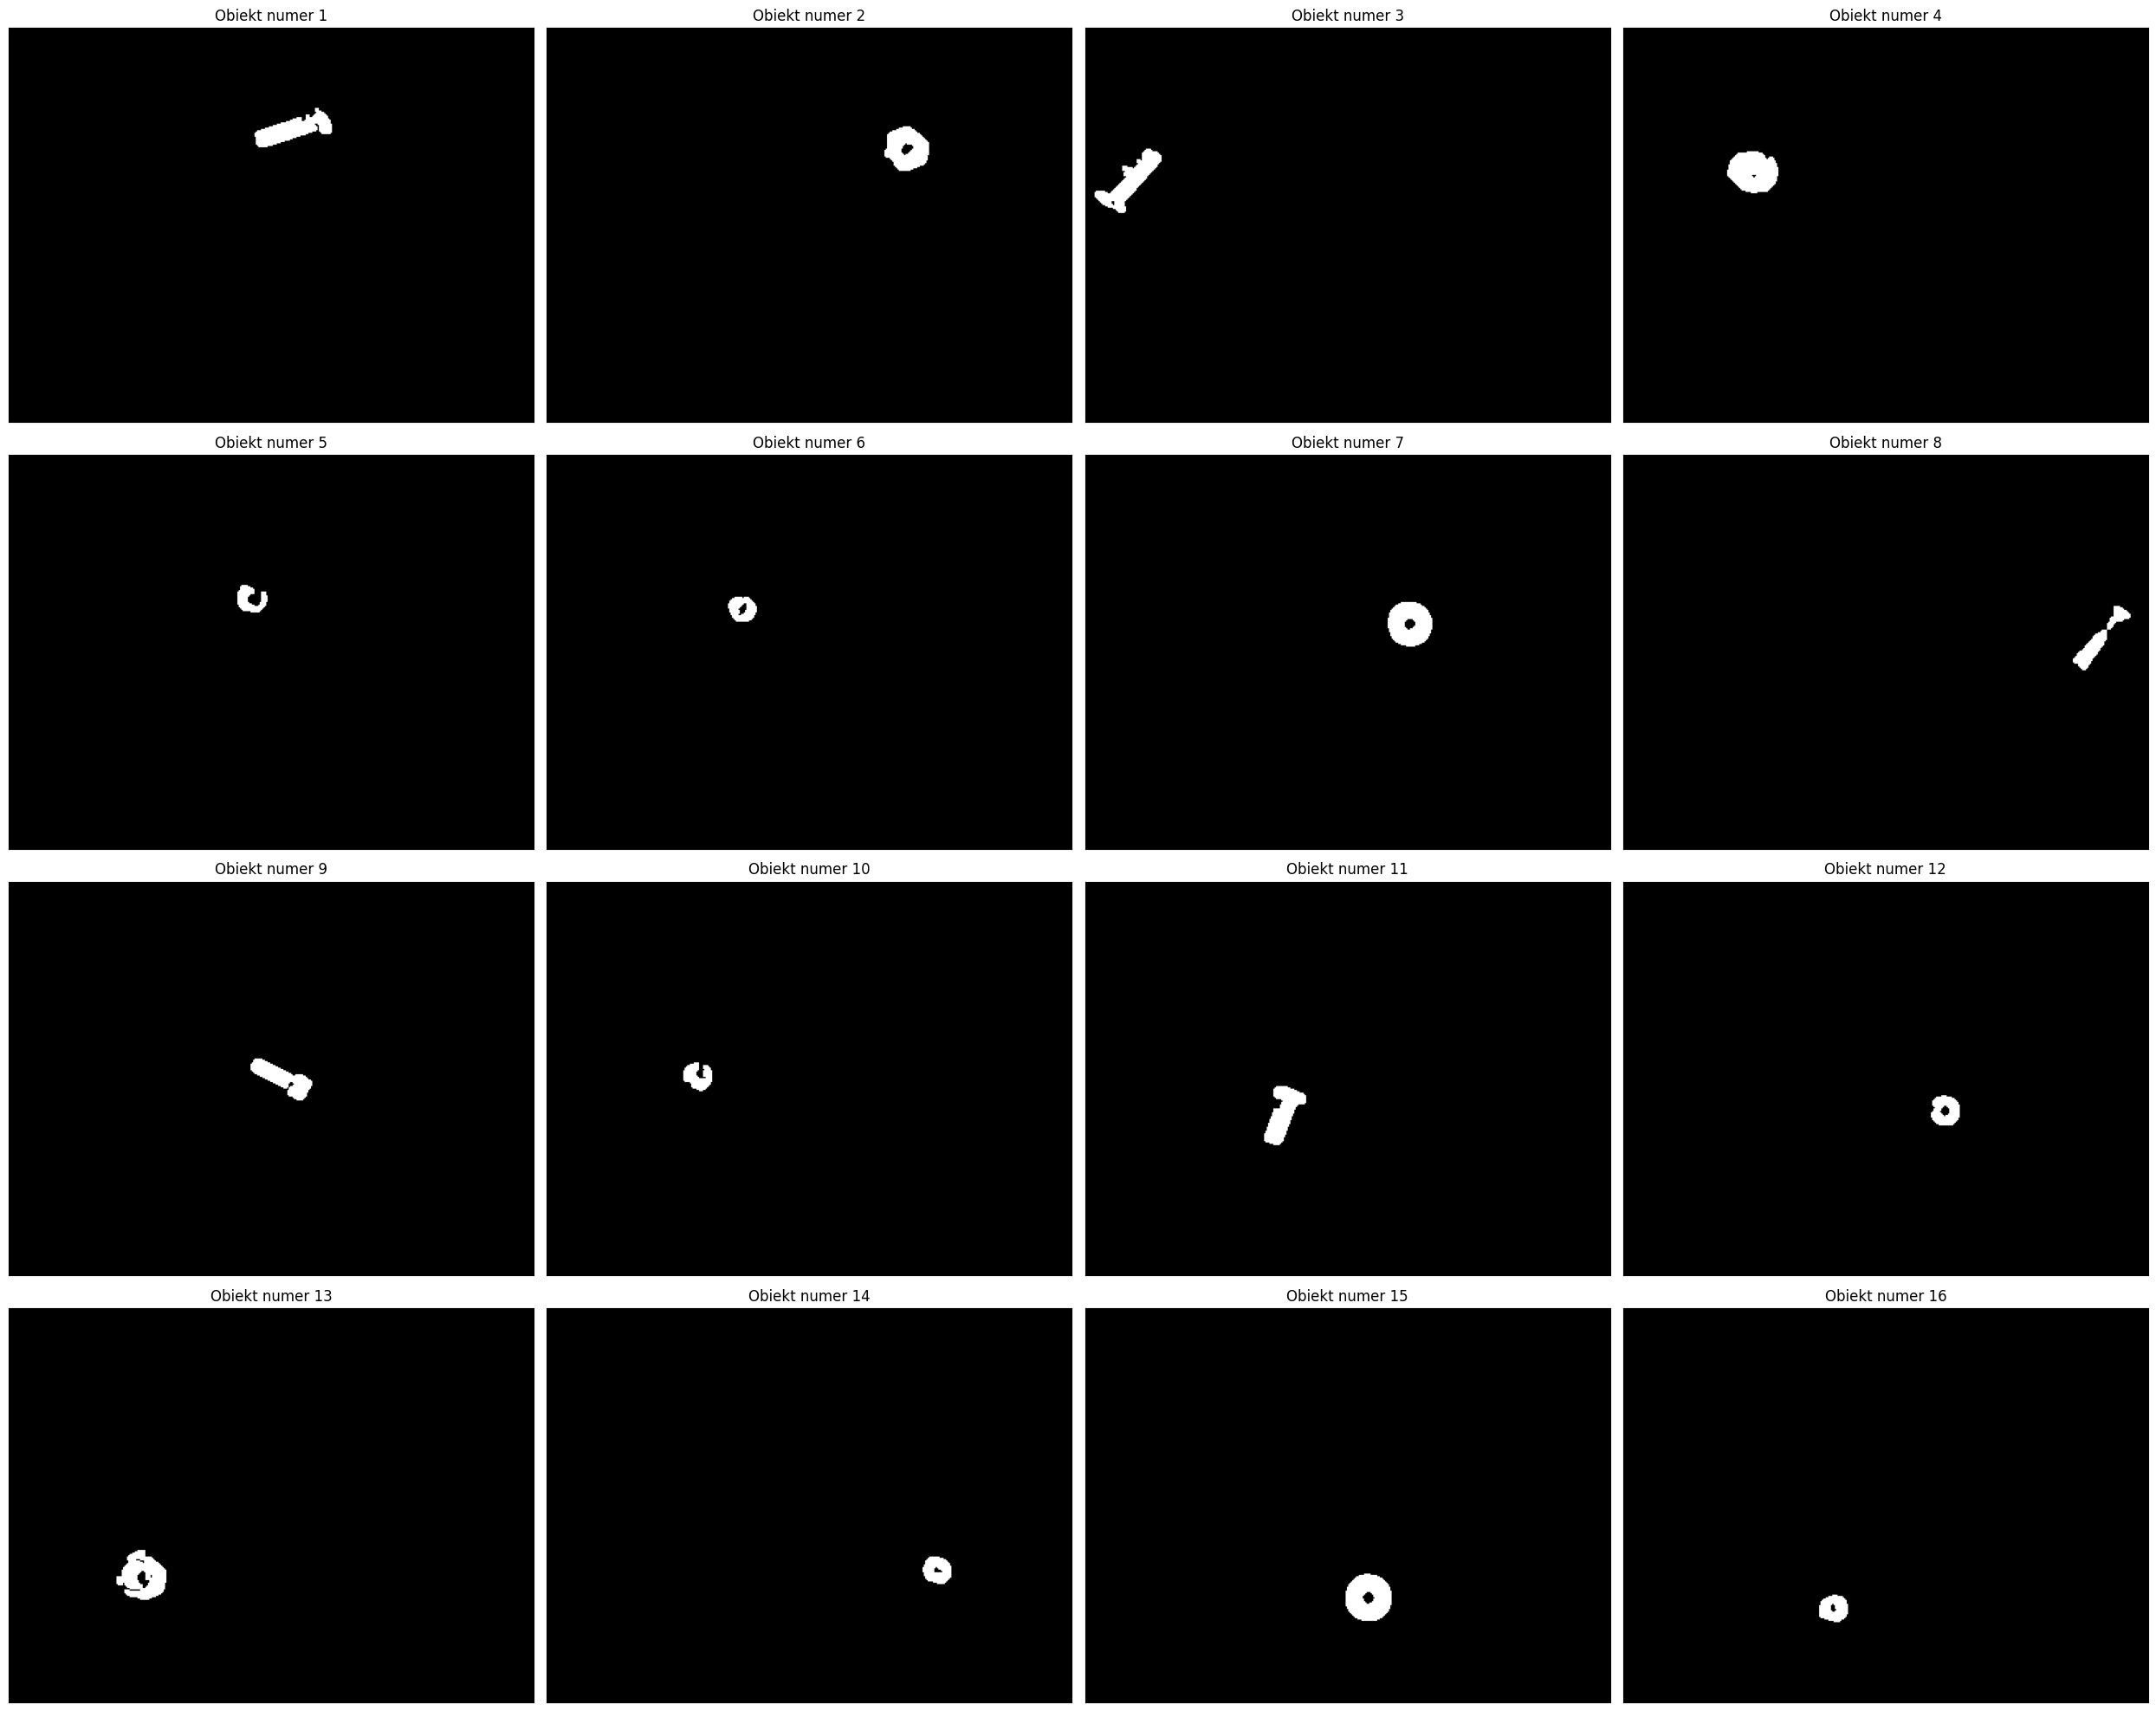

In [7]:
moments = []
HuMoments = []
images = []
plt.figure(figsize=(25, 20))
for i in range(1, lb):
    print('====================')
    print(f'Obiekt numer {i}')
    I = (details_ident == i) * 1
    I = I.astype('uint8')
    images.append(I)
    moments.append(cv2.moments(I))
    HuMoments.append(cv2.HuMoments(moments[i - 1]))
    print(f'Moments: {moments[i - 1]["m00"]}')
    print(f'HuMoments 1: {HuMoments[i - 1][0][0]:.6f}')
    print(f'HuMoments 2: {HuMoments[i - 1][1][0]:.6f}')
    print(f'HuMoments 3: {HuMoments[i - 1][2][0]:.6f}')
    plt.subplot(4, 4, i)
    plt.imshow(I)
    plt.xticks([])
    plt.yticks([])
    plt.gray()
    plt.title(f'Obiekt numer {i}')
    plt.tight_layout()

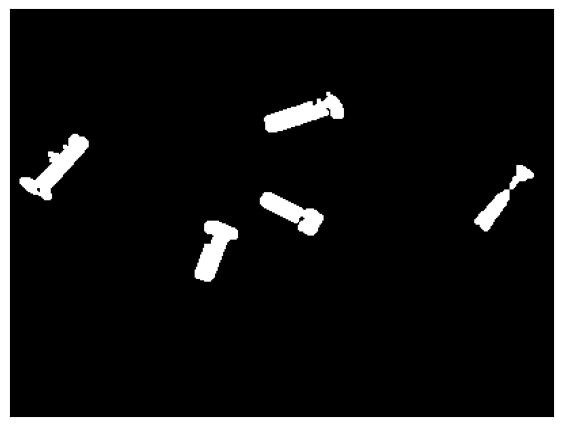

In [8]:
srubki = np.zeros(details.shape)
for i in range(len(images)):
    if moments[i]['m00'] > 320 and moments[i]['m00'] < 865 and HuMoments[i][0][0] > 0.18 and HuMoments[i][1][0] > 0.03:
        srubki += images[i]

img_show(srubki)

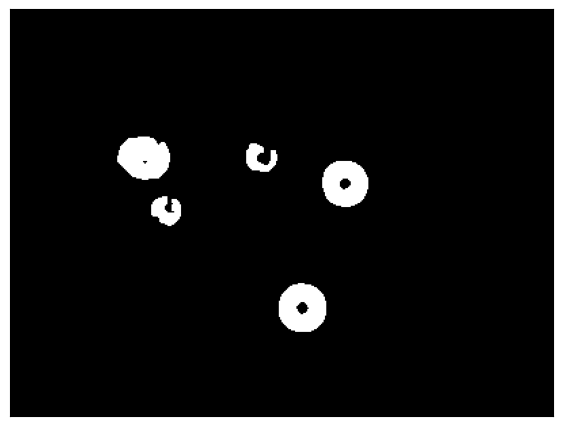

In [9]:
podkladki = np.zeros(details.shape)
for i in range(len(images)):
    if (moments[i]['m00'] > 282 and moments[i]['m00'] < 380 and HuMoments[i][0][0] > 0.19 and HuMoments[i][0][0] < 0.26 and HuMoments[i][2][0] > 5.25*10**(-5)) or (moments[i]['m00'] > 886 and moments[i]['m00'] < 972 and HuMoments[i][0][0] > 0.16 and HuMoments[i][0][0] < 0.18):
        podkladki += images[i]

img_show(podkladki)

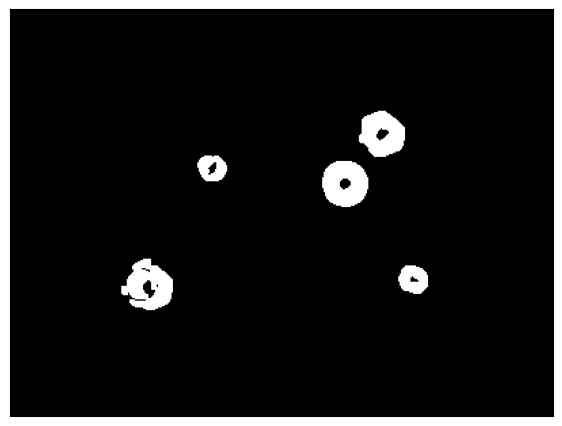

In [10]:
nakretki = np.zeros(details.shape)
for i in range(len(images)):
    if (moments[i]['m00']>302 and moments[i]['m00']<355 and HuMoments[i][0][0] > 0.17 and HuMoments[i][0][0] < 0.196) or (moments[i]['m00']>819 and moments[i]['m00']<910 and HuMoments[i][0][0] > 0.17 and HuMoments[i][0][0] < 0.20):
        nakretki += images[i]

img_show(nakretki)